<a href="https://colab.research.google.com/github/haluowan/pytorch/blob/master/time_seris_prediction_in_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
% matplotlib inline

In [0]:
# hyper parameters
num_time_steps = 50
input_size = 1
hidden_size = 16
output_size = 1
lr=0.01


In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.rnn = nn.RNN(input_size = input_size,
                         hidden_size = hidden_size,
                         num_layers = 1,
                         batch_first = True)
        for p in self.rnn.parameters():
            nn.init.normal_(p,mean=0.0,std=0.001)
            
        self.linear = nn.Linear(hidden_size,output_size)
        
    def forward(self,x,hidden_prev):
        out,hidden_prev = self.rnn(x,hidden_prev)
        # [b,seq,h]
        out = out.view(-1,hidden_size)
        out = self.linear(out)
        out = out.unsqueeze(dim=0)
        return out,hidden_prev
    
        

In [0]:
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=lr)

In [0]:
hidden_prev = torch.zeros(1,1,hidden_size)

In [18]:
for step in range(3000):
    start = np.random.randint(3,size=1)[0]
    time_steps = np.linspace(start,start+10,num_time_steps)
    data = np.sin(time_steps)
    data = data.reshape(num_time_steps,1)
    x = torch.tensor(data[:-1]).float().view(1,num_time_steps-1,1)
    y = torch.tensor(data[1:]).float().view(1,num_time_steps-1,1)
    
    output,hidden_prev = model(x,hidden_prev)
    hidden_prev = hidden_prev.detach()
    
    loss = criterion(output,y)
    model.zero_grad()
    loss.backward()
    optimizer.step()
    
    if step % 100 == 0:
        print('Iteration:{} | Loss:{}'.format(step,loss.item()))
        


Iteration:0 | Loss:0.4818926751613617
Iteration:100 | Loss:0.004090819973498583
Iteration:200 | Loss:0.0023044943809509277
Iteration:300 | Loss:0.0028797078412026167
Iteration:400 | Loss:0.008131449110805988
Iteration:500 | Loss:0.005484625231474638
Iteration:600 | Loss:0.00104797282256186
Iteration:700 | Loss:0.0008326804381795228
Iteration:800 | Loss:0.001094542327336967
Iteration:900 | Loss:0.0005812951130792499
Iteration:1000 | Loss:0.0014203262981027365
Iteration:1100 | Loss:0.0017796100582927465
Iteration:1200 | Loss:0.0004121323872823268
Iteration:1300 | Loss:0.00011309896945022047
Iteration:1400 | Loss:0.0001921374787343666
Iteration:1500 | Loss:0.0007306758780032396
Iteration:1600 | Loss:0.00015718424401711673
Iteration:1700 | Loss:0.0004020417982246727
Iteration:1800 | Loss:0.0008595791878178716
Iteration:1900 | Loss:0.00010397488222224638
Iteration:2000 | Loss:9.801427950151265e-05
Iteration:2100 | Loss:0.0004990297020412982
Iteration:2200 | Loss:0.0005457969382405281
Iterat

In [0]:
start = np.random.randint(3,size=1)[0]
time_steps = np.linspace(start,start + 10,num_time_steps)
data = np.sin(time_steps)
data = data.reshape(num_time_steps,1)
x = torch.tensor(data[:-1]).float().view(1,num_time_steps - 1,1)
y = torch.tensor(data[1:]).float().view(1,num_time_steps -1,1)


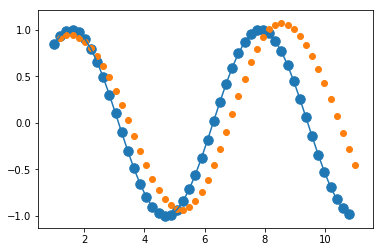

In [20]:
predictions = []
input = x[:,0,:]
for _ in range(x.shape[1]):
    input = input.view(1,1,1)
    (pred,hidden_prev) = model(input,hidden_prev)
    input = pred
    predictions.append(pred.detach().numpy().ravel()[0])
    
x = x.data.numpy().ravel()
y = y.data.numpy()

plt.scatter(time_steps[:-1],x.ravel(),s=90)
plt.plot(time_steps[:-1],x.ravel())

plt.scatter(time_steps[1:],predictions)
plt.show()